연습문제11-01

In [1]:
import pandas as pd

# 데이터 프레임 생성
df = pd.DataFrame({
    'date': ['2023-01-01', '2023-01-02', '2023-01-03'],
    'price': [1000, 1200, 1300]
})

# date 컬럼을 datetime형으로 변환
df['date'] = pd.to_datetime(df['date'])

# 결과 확인
print(df.dtypes)
print(df)

#date를 인덱스로 설정
df.set_index('date', inplace=True)

#결과확인
print(df.info())



date     datetime64[ns]
price             int64
dtype: object
        date  price
0 2022-01-01   1000
1 2022-01-02   1200
2 2022-01-03   1300
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3 entries, 2022-01-01 to 2022-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes
None


연습문제11-02

In [7]:
df_idx = pd.date_range('2019-12-01 01:00', periods=40) # 시계열 데이터 생성
df = pd.DataFrame(range(len(df_idx)),columns=['col'], index=df_idx)
print(df.head())

#월단위로 재조정하기
df_monthly = df.resample('M').mean()
print(df_monthly.head())

                     col
2019-12-01 01:00:00    0
2019-12-02 01:00:00    1
2019-12-03 01:00:00    2
2019-12-04 01:00:00    3
2019-12-05 01:00:00    4
             col
2019-12-31  15.0
2020-01-31  35.0


연습문제11-03

In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
    "date": pd.date_range("2022-12-25", periods=100, freq="D"), 
    "value": np.random.randint(100, size=(100,))})
df.resample('M', on='date')['value'].sum()

date
2022-12-31     271
2023-01-31    1526
2023-02-28    1364
2023-03-31    1599
2023-04-30     187
Freq: M, Name: value, dtype: int64

연습문제11-04

In [60]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# 데이터 프레임 생성
data = pd.DataFrame({'date': pd.date_range('20230101', periods=100),
                     'product': ['banana']*100,
                     'price': [25]*25+[100]*30 + [120]*45})

# 시계열 데이터 분석을 위해 인덱스를 날짜로 설정
data.set_index('date', inplace=True)

# ARIMA 모델 학습
model = ARIMA(data['price'], order=(1, 1, 0))  # ARIMA(1,1,0) 모델
model_fit = model.fit()

# 다음날 예측 값 계산
forecast = model_fit.forecast(steps=2)

# 다음날 바나나 가격 출력
forecast

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


2023-04-11    120.0
2023-04-12    120.0
Freq: D, Name: predicted_mean, dtype: float64

연습문제11-05

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
# 데이터 불러오기
df=pd.read_csv('/content/연습11-05.csv')
# 데이터 탐색
print(df.head())
# 시계열 데이터 분석을 위해 인덱스를 날짜로 설정
df.set_index('date', inplace=True)

# 4. ARIMA 모델 학습 및 테스트
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# ARIMA 모델 학습
model = ARIMA(df['failure_rate'], order=(1,1,1))
model_fit = model.fit()

# 데이터 예측
forecast = model_fit.forecast(steps=10)

print(forecast)


         date  failure_rate
0  2015-01-01      0.013484
1  2015-02-01      0.008216
2  2015-03-01      0.013726
3  2015-04-01      0.002260
4  2015-05-01      0.007578


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency informa

(array([0.01076738, 0.01075661, 0.01075661, 0.01075667, 0.01075674,
       0.0107568 , 0.01075686, 0.01075692, 0.01075698, 0.01075705]), array([0.00498133, 0.00498227, 0.00498277, 0.00498325, 0.00498374,
       0.00498423, 0.00498472, 0.00498521, 0.0049857 , 0.00498618]), array([[0.00100416, 0.02053061],
       [0.00099153, 0.02052169],
       [0.00099057, 0.02052265],
       [0.00098968, 0.02052367],
       [0.00098878, 0.02052469],
       [0.00098789, 0.02052571],
       [0.00098699, 0.02052673],
       [0.0009861 , 0.02052775],
       [0.0009852 , 0.02052877],
       [0.00098431, 0.02052979]]))


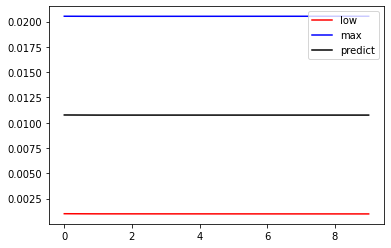

In [78]:
predict_y = forecast[0].tolist()
# 마지막 예측 데이터 최솟값
pred_y_lower = []
# 마지막 예측 데이터 최댓값
pred_y_upper = []
for lower,upper in forecast[2]:
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
# 모델이 예측한 최저 고장률 그래프
plt.plot(pred_y_lower, color = 'red')
# 모델이 예측한 최고 고장률 그래프
plt.plot(pred_y_upper, color = 'blue')
# 모델이 예측한 평균고장률
plt.plot(predict_y ,color='black')
plt.legend(['low', 'max','predict'])

연습문제11-06

In [79]:
!pip install finance-DataReader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

             Open   High    Low  Close    Volume    Change
Date                                                      
2021-01-04  81000  84400  80200  83000  38655276  0.024691
2021-01-05  81600  83900  81600  83900  35335669  0.010843
2021-01-06  83300  84500  82100  82200  42089013 -0.020262
2021-01-07  82800  84200  82700  82900  32644642  0.008516
2021-01-08  83300  90000  83000  88800  59013307  0.071170
             Open   High    Low  Close    Volume    Change
Date                                                      
2021-12-24  80200  80800  80200  80500  12086380  0.007509
2021-12-27  80600  80600  79800  80200  10783368 -0.003727
2021-12-28  80200  80400  79700  80300  18226325  0.001247
2021-12-29  80200  80200  78500  78800  19794795 -0.018680
2021-12-30  78900  79500  78100  78300  14236700 -0.006345


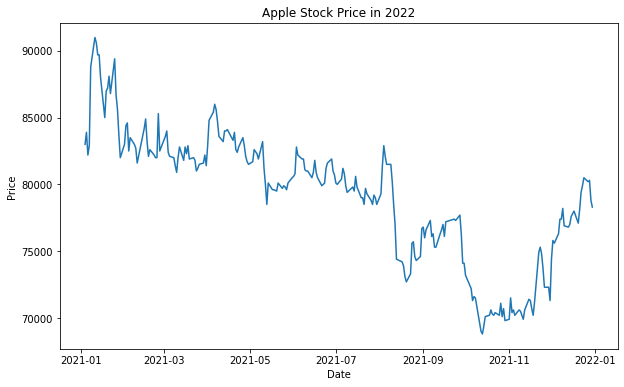

In [81]:
# 삼성전자 주식 데이터 수집
df = fdr.DataReader('005930','2021','2022')
# 데이터 확인
print(df.head())
print(df.tail())
# 주식 가격 시각화하기
plt.figure(figsize=(10, 6))
sns.lineplot(x=df.index, y=df['Close'])
plt.title('Apple Stock Price in 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [82]:
#한달 간격으로 다운샘플링
df_month=df.resample("BM").mean()
print(df_month.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-29  86365.000000  88410.000000  85190.000000  86565.000000   
2021-02-26  83272.222222  84177.777778  82400.000000  83127.777778   
2021-03-31  82250.000000  82763.636364  81609.090909  82072.727273   
2021-04-30  83786.363636  84150.000000  83095.454545  83586.363636   
2021-05-31  80547.368421  81105.263158  80015.789474  80521.052632   

                  Volume    Change  
Date                                
2021-01-29  3.827356e+07  0.000916  
2021-02-26  2.405296e+07  0.000500  
2021-03-31  1.761874e+07 -0.000570  
2021-04-30  1.695174e+07  0.000101  
2021-05-31  1.853742e+07 -0.000592  


In [83]:
#수익률 추가하기
df_month['rtn']=df_month['Close'].pct_change()
print(df_month.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-29  86365.000000  88410.000000  85190.000000  86565.000000   
2021-02-26  83272.222222  84177.777778  82400.000000  83127.777778   
2021-03-31  82250.000000  82763.636364  81609.090909  82072.727273   
2021-04-30  83786.363636  84150.000000  83095.454545  83586.363636   
2021-05-31  80547.368421  81105.263158  80015.789474  80521.052632   

                  Volume    Change       rtn  
Date                                          
2021-01-29  3.827356e+07  0.000916       NaN  
2021-02-26  2.405296e+07  0.000500 -0.039707  
2021-03-31  1.761874e+07 -0.000570 -0.012692  
2021-04-30  1.695174e+07  0.000101  0.018443  
2021-05-31  1.853742e+07 -0.000592 -0.036672  


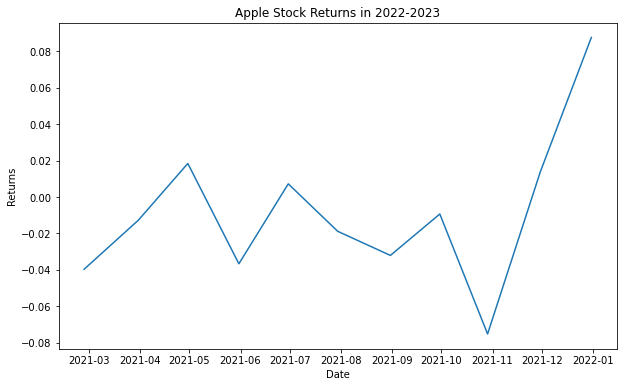

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_month.index, y=df_month['rtn'])
plt.title('Apple Stock Returns in 2022-2023')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [85]:
df_month['MA']=df_month['Close'].rolling(2).mean()
print(df_month.head())

                    Open          High           Low         Close  \
Date                                                                 
2021-01-29  86365.000000  88410.000000  85190.000000  86565.000000   
2021-02-26  83272.222222  84177.777778  82400.000000  83127.777778   
2021-03-31  82250.000000  82763.636364  81609.090909  82072.727273   
2021-04-30  83786.363636  84150.000000  83095.454545  83586.363636   
2021-05-31  80547.368421  81105.263158  80015.789474  80521.052632   

                  Volume    Change       rtn            MA  
Date                                                        
2021-01-29  3.827356e+07  0.000916       NaN           NaN  
2021-02-26  2.405296e+07  0.000500 -0.039707  84846.388889  
2021-03-31  1.761874e+07 -0.000570 -0.012692  82600.252525  
2021-04-30  1.695174e+07  0.000101  0.018443  82829.545455  
2021-05-31  1.853742e+07 -0.000592 -0.036672  82053.708134  


<AxesSubplot:xlabel='Date'>

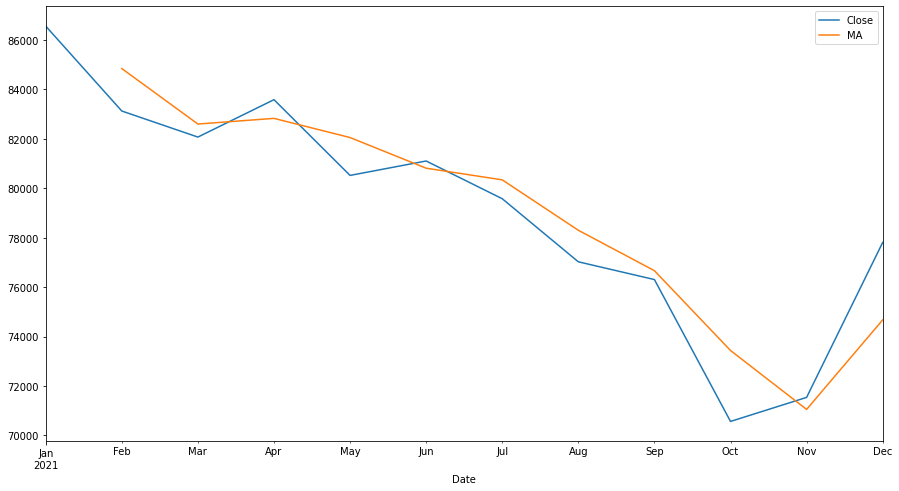

In [86]:
df_month.iloc[:,[3,7]].plot(figsize=(15,8))

In [89]:
model=ARIMA(df['Close'].values,order=(2,1,1))
model_fit=model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  247
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2075.029
Method:                       css-mle   S.D. of innovations           1076.799
Date:                Fri, 24 Feb 2023   AIC                           4160.058
Time:                        19:51:13   BIC                           4177.605
Sample:                             1   HQIC                          4167.122
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.0805     42.694     -0.611      0.541    -109.758      57.597
ar.L1.D.y      0.9226      0.152      6.052      0.000       0.624       1.221
ar.L2.D.y     -0.1219      0.069     -1.757      0.0

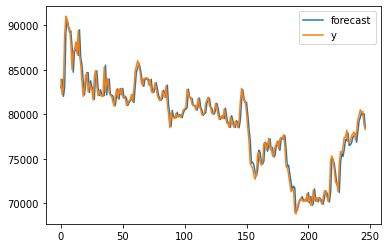

In [90]:
fig=model_fit.plot_predict()

In [91]:
forecast_data=model_fit.forecast(steps=5)
forecast_data

(array([78187.8109946 , 78140.04373957, 78104.44943906, 78072.23475412,
        78041.65451987]),
 array([1076.7985474 , 1555.51904808, 1867.58778965, 2093.45647693,
        2269.27910956]),
 array([[76077.32462309, 80298.29736611],
        [75091.28242807, 81188.80505106],
        [74444.04463337, 81764.85424475],
        [73969.13545615, 82175.3340521 ],
        [73593.94919426, 82489.35984549]]))

In [92]:
predict_y = forecast_data[0].tolist()
# 마지막 예측 데이터 최솟값
pred_y_lower = []
# 마지막 예측 데이터 최댓값
pred_y_upper = []
for lower,upper in forecast_data[2]:
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

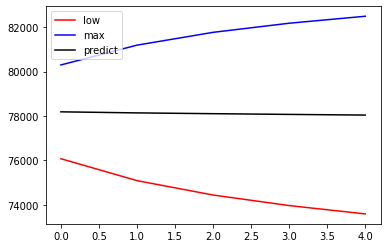

In [93]:
# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')
# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')
# 실제 가격 그래프
plt.plot(predict_y ,color='black')
plt.legend(['low', 'max','predict'])